In [96]:
import numpy as np 
import pandas as pd #
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [97]:
data=pd.read_csv("C:/Users/lenovo/Desktop/DS/SolarPrediction.csv")

In [88]:
data_test=pd.read_excel("C:/Users/lenovo/Desktop/DS/Solarradiation.xlsx")

In [57]:
data.head

<bound method NDFrame.head of          UNIXTime                   Data      Time  Radiation  Temperature  \
0      1475229326  9/29/2016 12:00:00 AM  23:55:26       1.21           48   
1      1475229023  9/29/2016 12:00:00 AM  23:50:23       1.21           48   
2      1475228726  9/29/2016 12:00:00 AM  23:45:26       1.23           48   
3      1475228421  9/29/2016 12:00:00 AM  23:40:21       1.21           48   
4      1475228124  9/29/2016 12:00:00 AM  23:35:24       1.17           48   
...           ...                    ...       ...        ...          ...   
32681  1480587604  12/1/2016 12:00:00 AM  00:20:04       1.22           44   
32682  1480587301  12/1/2016 12:00:00 AM  00:15:01       1.17           44   
32683  1480587001  12/1/2016 12:00:00 AM  00:10:01       1.20           44   
32684  1480586702  12/1/2016 12:00:00 AM  00:05:02       1.23           44   
32685  1480586402  12/1/2016 12:00:00 AM  00:00:02       1.20           44   

       Pressure  Humidity  WindDi

In [83]:
data_test

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Radiation
0,69.8,29.91,49,275,10.56,NaN


In [58]:
data.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [59]:
data_test.head

<bound method NDFrame.head of    Temperature  Pressure  Humidity  WindDirection(Degrees)  Speed  Radiation
0         69.8     29.91        50                     275      8        NaN>

In [60]:
data_train=data.drop(['UNIXTime','Data','Time','TimeSunRise','TimeSunSet'],axis=1)
print(final_data)


       Radiation  Temperature  Pressure  Humidity  WindDirection(Degrees)  \
0           1.21           48     30.46        59                  177.39   
1           1.21           48     30.46        58                  176.78   
2           1.23           48     30.46        57                  158.75   
3           1.21           48     30.46        60                  137.71   
4           1.17           48     30.46        62                  104.95   
...          ...          ...       ...       ...                     ...   
32681       1.22           44     30.43       102                  145.42   
32682       1.17           44     30.42       102                  117.78   
32683       1.20           44     30.42       102                  145.19   
32684       1.23           44     30.42       101                  164.19   
32685       1.20           44     30.43       101                   83.59   

       Speed  
0       5.62  
1       3.37  
2       3.37  
3       3.37  


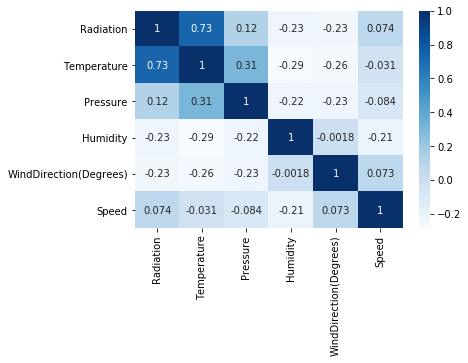

In [61]:
corr = data_train.corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

In [62]:
print(" the missing values are:\n",data_train.isnull().sum())

 the missing values are:
 Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
dtype: int64


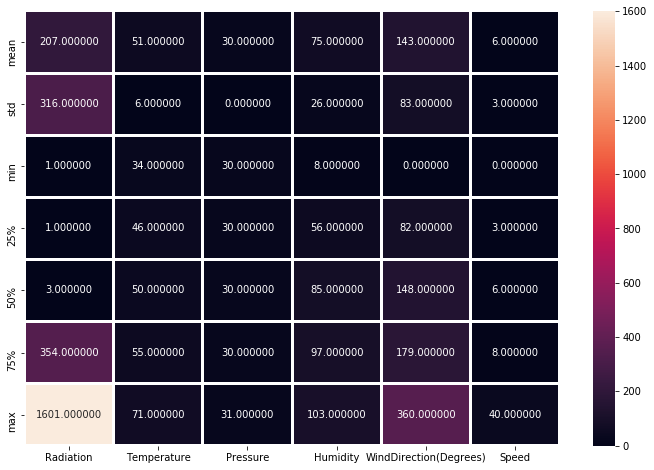

In [63]:
data_train.describe()
plt.figure(figsize=(12,8))
sns.heatmap(round(data_train.describe()[1:]),annot=True,linewidth=2,fmt='f')
plt.show()

In [98]:
X_train=data_train.drop("Radiation",axis=1)
X_test  = data_test.drop("Radiation", axis=1).copy()

In [99]:
Y_train = data_train["Radiation"]

In [66]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgr =XGBRegressor()
xgr.fit(X_train, Y_train) 
acc_xgb= round(xgr.score(X_train, Y_train) * 100, 2)
acc_xgb

81.46

In [67]:
from sklearn.ensemble import RandomForestRegressor 
rfr = RandomForestRegressor(n_estimators=100) 
rfr.fit(X_train, Y_train) 
acc_rfr=round(rfr.score(X_train,Y_train)*100,2)
print("the accuracy of drandom tree regression is :",acc_rfr)

the accuracy of drandom tree regression is : 96.51


In [100]:
from sklearn.tree import DecisionTreeRegressor 
dtr = DecisionTreeRegressor() 
dtr.fit(X_train, Y_train) 
acc_dtr=round(dtr.score(X_train,Y_train)*100,2)
print("the accuracy of decision tree regression is :",acc_dtr)

the accuracy of decision tree regression is : 100.0


In [101]:
# so the accuracy of decision tree is 100 we will use decision tree regression for prediction on test data
y_pred_dtr = dtr.predict(X_test)
print("the solar radiation for test data is", y_pred_dtr)

the solar radiation for test data is [847.88]
